 #HTR USING TENSORFLOW

#libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read dataset

In [2]:
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#splitting of data

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

#Performing Split Using Sklearn:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))
print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


In [5]:
shuffle_data = shuffle(x_train)

KeyError: 0

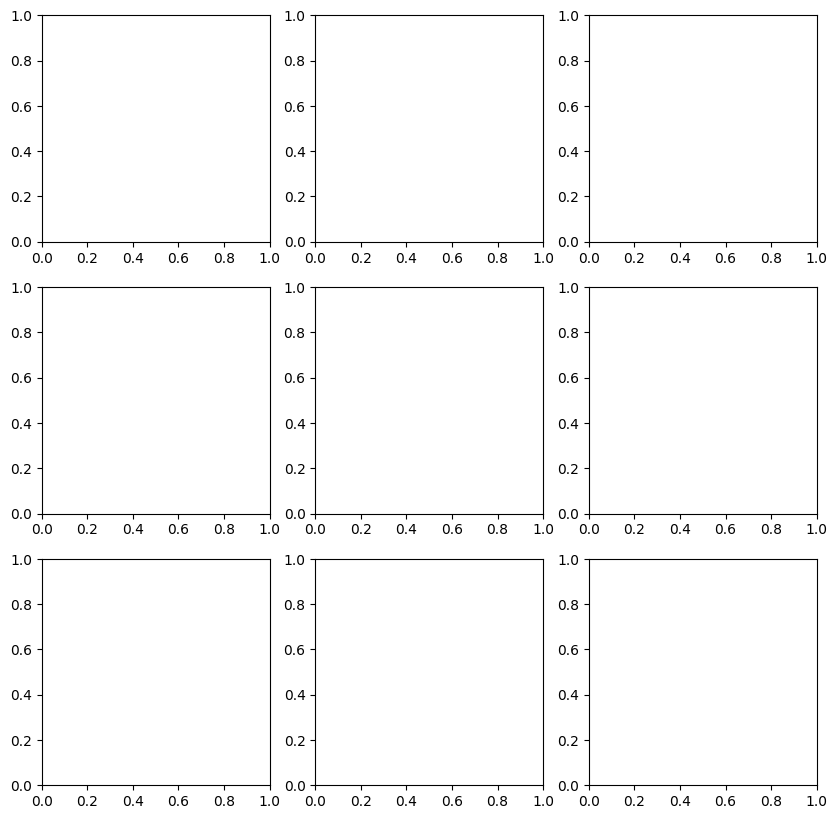

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    image = np.reshape(shuffle_data[i], (28, 28))
    _, shu = cv2.threshold(image, 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(shu, cmap="Greys")
    axes[i].axis("off")

plt.show()


#training of our model

In [11]:

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [12]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Ensure y_train and y_test contain labels in range [0, 25]
y_training = to_categorical(y_train, num_classes=26)  # Default dtype is float32
y_testing = to_categorical(y_test, num_classes=26)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [14]:
model = Sequential()

model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,522 (478.60 KB)

 Trainable params: 122,522 (478.60 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_training, epochs=2,  validation_data = (x_test,y_testing))

Epoch 1/2
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 551s 59ms/step - accuracy: 0.9689 - loss: 0.1131 - val_accuracy: 0.9585 - val_loss: 0.1476
Epoch 2/2
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 542s 58ms/step - accuracy: 0.9728 - loss: 0.0978 - val_accuracy: 0.9744 - val_loss: 0.0938


In [19]:
model.save(r'handwritten_character_recog_model.h5')

In [ ]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

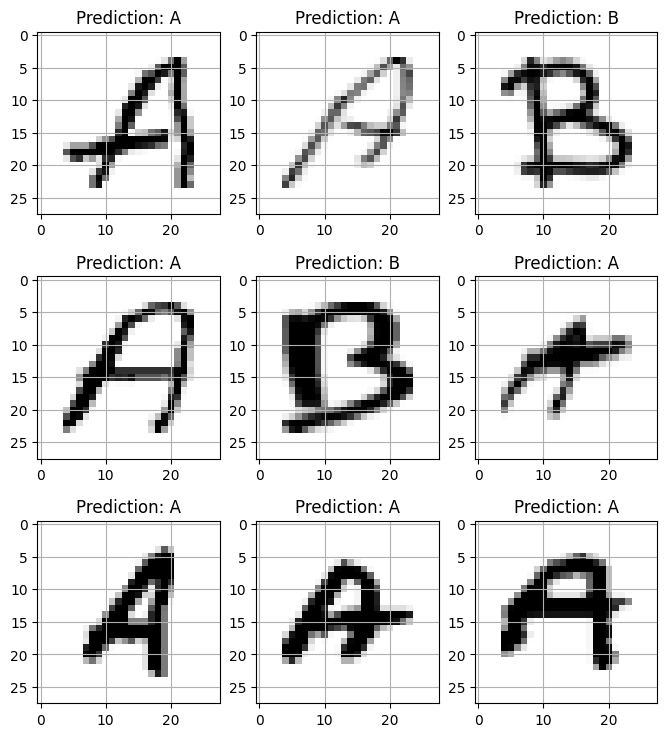

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

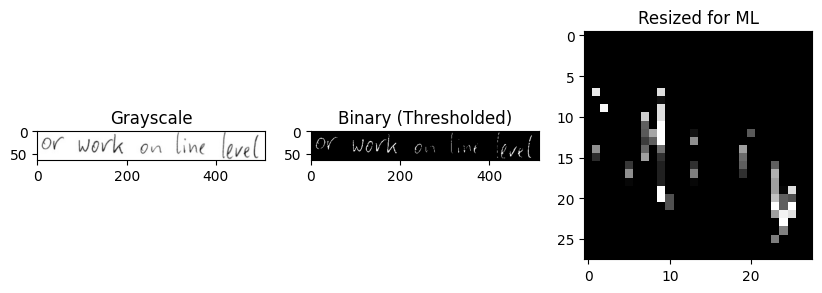

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('line.png')

# Check if image exists
if image is None:
    print("Error: Image file 'line.png' not found.")
    exit()

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Binary Thresholding (Converts to Black & White)
_, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

# Resize to 28x28 for ML Models (if needed)
resized_image = cv2.resize(binary_image, (28, 28))

# Normalize Pixel Values (Scale from 0-255 to 0-1)
normalized_image = resized_image.astype('float32') / 255.0

# Display Images
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary (Thresholded)')

plt.subplot(1, 3, 3)
plt.imshow(resized_image, cmap='gray')
plt.title('Resized for ML')

plt.show()

# Reshape for TensorFlow Model (if needed)
final_image = np.reshape(normalized_image, (1, 28, 28, 1))




In [15]:
pip install easyocr opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 834.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

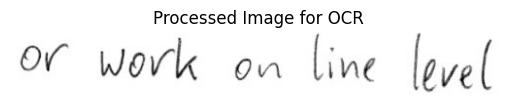

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
📝 Extracted Digital Text:

Ov Wovk On line  leve(


In [16]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('line.png')

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display Image
plt.imshow(gray_image, cmap='gray')
plt.title("Processed Image for OCR")
plt.axis("off")
plt.show()

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # English Language

# Extract Text
extracted_text = reader.readtext(gray_image, detail=0)

# Print Extracted Text
print("\n📝 Extracted Digital Text:\n")
print(" ".join(extracted_text))


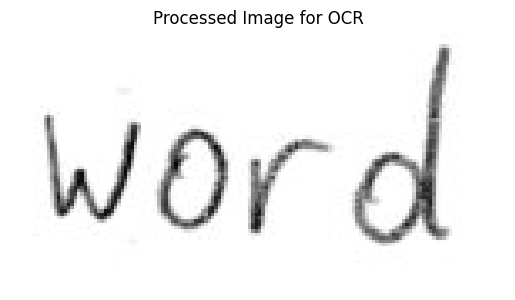


📝 Extracted Digital Text:

Wr d


In [17]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('word.png')

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display Image
plt.imshow(gray_image, cmap='gray')
plt.title("Processed Image for OCR")
plt.axis("off")
plt.show()

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # English Language

# Extract Text
extracted_text = reader.readtext(gray_image, detail=0)

# Print Extracted Text
print("\n📝 Extracted Digital Text:\n")
print(" ".join(extracted_text))


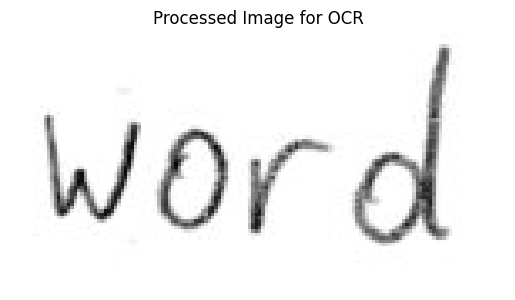


📝 Extracted Digital Text:

Wr d


In [19]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('word.png')

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display Image
plt.imshow(gray_image, cmap='gray')
plt.title("Processed Image for OCR")
plt.axis("off")
plt.show()

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # English Language

# Extract Text
extracted_text = reader.readtext(gray_image, detail=0)

# Print Extracted Text
print("\n📝 Extracted Digital Text:\n")
print(" ".join(extracted_text))
